<a href="https://colab.research.google.com/github/Steve0201/Signals/blob/master/PismoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import struct
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [23]:
############### WCZYTANIE ZESTAWU DANYCH ###############################
def load_mnist(labels,images,kind='train'):
    lbpath = labels

    imgpath = images


    magic, n = struct.unpack('>II',lbpath.read(8))
    labels = np.fromfile(lbpath,dtype = np.uint8)


    magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
    images = np.fromfile(imgpath,dtype = np.uint8).reshape(len(labels),784)
    images = ((images/255.)-.5)*2
    
    return images,labels
  
mnist = input_data.read_data_sets("/tmp/data/", one_hot = False)
  
X_train,y_train = mnist.train.images,mnist.train.labels
print('Rzędy:%d ,Kolumny: %d'%(X_train.shape[0],X_train.shape[1]))

X_test,y_test = mnist.test.images,mnist.test.labels
print('Rzędy:%d ,Kolumny: %d'%(X_test.shape[0],X_test.shape[1]))

## środkowanie do średniej i normalizacja
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train-mean_vals)/std_val
X_test_centered = (X_test-mean_vals)/std_val

X_train, X_test

print(X_train_centered.shape,y_train.shape)
print(X_test_centered.shape,y_test.shape)



Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Rzędy:55000 ,Kolumny: 784
Rzędy:10000 ,Kolumny: 784
(55000, 784) (55000,)
(10000, 784) (10000,)


In [14]:
n_features = X_train_centered.shape[1]
n_classes = 10
random_seed = 123
np.random.seed(random_seed)

g = tf.Graph()
with g.as_default():
  tf.set_random_seed(random_seed)
  tf_x = tf.placeholder(dtype=tf.float32,shape=(None, n_features),name='tf_x')
  
  tf_y = tf.placeholder(dtype=tf.int32,shape=None,name = 'tf_y')
  
  y_onehot = tf.one_hot(indices = tf_y, depth = n_classes)
  h1 = tf.layers.dense(inputs = tf_x, units = 50,activation = tf.tanh, name = 'wartswa1')
  h2 = tf.layers.dense(inputs = h1, units = 50, activation = tf.tanh, name = 'wartswa2')
  logits = tf.layers.dense(inputs = h2, units = 10, activation = None, name = 'wartswa3')
  
  predictions = {
      'classes' : tf.argmax(logits, axis = 1, name = 'przewidywane_klasy'),
      'probabilities' : tf.nn.softmax(logits, name = 'tensor_softmax')
      
  }
  
  ##funkcja kosztu i optymalizator
with g.as_default():
  cost = tf.losses.softmax_cross_entropy(onehot_labels = y_onehot, logits = logits)
  
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
  
  train_op = optimizer.minimize(loss = cost)
  
  init_op = tf.global_variables_initializer()
  
def create_batch_generator(X,y,batch_size = 128, shuffle = False):
  X_copy = np.array(X)
  y_copy = np.array(y)
  
  if shuffle:
    data = np.column_stack((X_copy, y_copy))
    np.random.shuffle(data)
    X_copy = data[:, :-1]
    y_copy = data[:, -1].astype(int)
    
  for i in range(0, X.shape[0], batch_size):
    yield(X_copy[i:i+batch_size,:], y_copy[i:i+batch_size])
    

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [16]:
##tworzy sesję uruchamiającą graf
sess = tf.Session(graph = g)
#uruchamia operację inicjowania zmiennych
sess.run(init_op)

##50 epok uczenia
for epoch in range(50):
  training_costs = []
  batch_generator = create_batch_generator(X_train_centered, y_train, batch_size = 64)
  
  for batch_X, batch_y in batch_generator:
    #przygotowuje słownik dostarczający dane do naszej sieci
    feed = {tf_x : batch_X, tf_y : batch_y}
    _, batch_cost = sess.run([train_op, cost],feed_dict = feed)
    training_costs.append(batch_cost)
    print('--Epoka %2d.''Śr. strata w trakcie uczenie: %.4f' %(epoch+1, np.mean(training_costs)))
    
##uzyskuje prognozy wobec zestawu testowego
feed = {tf_x : X_test_centered}
y_pred = sess.run(predictions['classes'],feed_dict = feed)

print('Dokładność dla podzbioru testowego: %.2f%%' %(100*np.sum(y_pred == y_test)/y_test.shape[0]))

--Epoka  1.Śr. strata w trakcie uczenie: 2.6162
--Epoka  1.Śr. strata w trakcie uczenie: 2.6177
--Epoka  1.Śr. strata w trakcie uczenie: 2.6027
--Epoka  1.Śr. strata w trakcie uczenie: 2.6223
--Epoka  1.Śr. strata w trakcie uczenie: 2.5898
--Epoka  1.Śr. strata w trakcie uczenie: 2.5744
--Epoka  1.Śr. strata w trakcie uczenie: 2.5778
--Epoka  1.Śr. strata w trakcie uczenie: 2.5621
--Epoka  1.Śr. strata w trakcie uczenie: 2.5440
--Epoka  1.Śr. strata w trakcie uczenie: 2.5466
--Epoka  1.Śr. strata w trakcie uczenie: 2.5289
--Epoka  1.Śr. strata w trakcie uczenie: 2.5228
--Epoka  1.Śr. strata w trakcie uczenie: 2.5239
--Epoka  1.Śr. strata w trakcie uczenie: 2.5219
--Epoka  1.Śr. strata w trakcie uczenie: 2.5118
--Epoka  1.Śr. strata w trakcie uczenie: 2.5082
--Epoka  1.Śr. strata w trakcie uczenie: 2.5077
--Epoka  1.Śr. strata w trakcie uczenie: 2.5045
--Epoka  1.Śr. strata w trakcie uczenie: 2.5018
--Epoka  1.Śr. strata w trakcie uczenie: 2.4991
--Epoka  1.Śr. strata w trakcie uczenie:

1


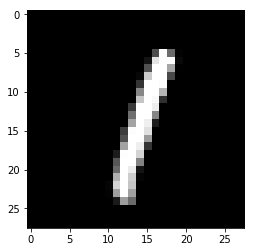

4


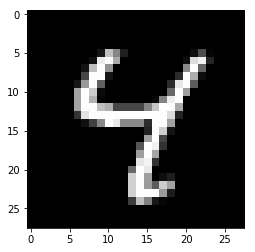

9


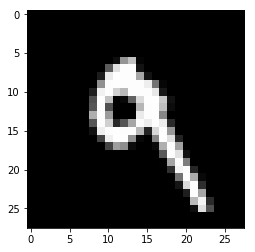

6


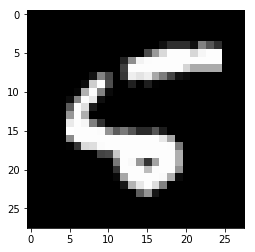

9


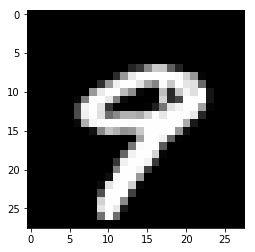

0


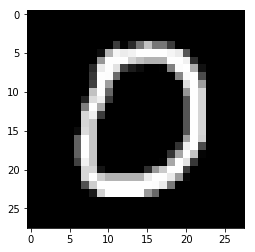

6


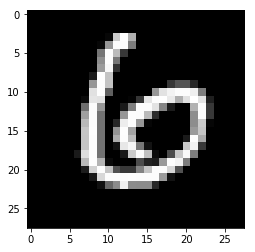

9


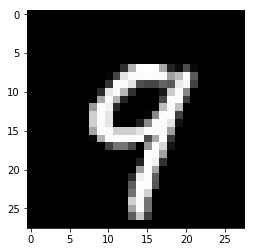

0


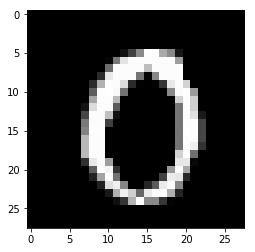

1


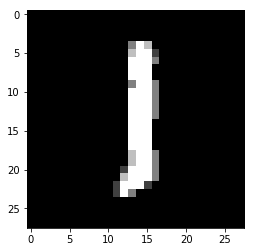

5


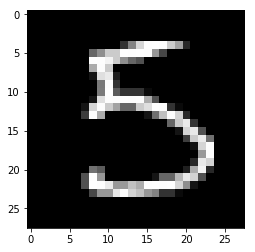

9


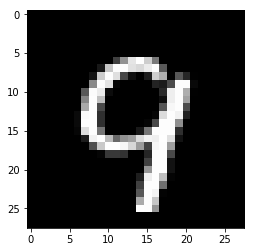

7


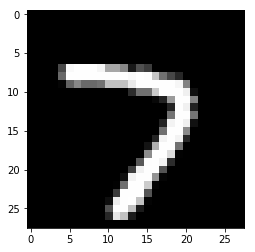

3


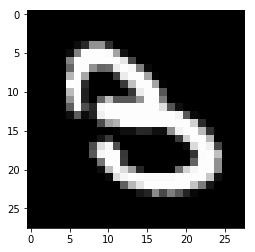

4


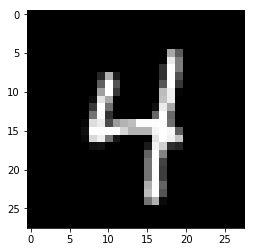

In [27]:
y_pred
for i in range(5,20):
  print(y_pred[i])
  plt.imshow(np.reshape(X_test[i], [28, 28]), cmap='gray')
  plt.show()